In [1]:
!pip install validators matplotlib

You should consider upgrading via the '/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cpu for inference


In [3]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

efficientnet.eval().to(device)

Using cache found in /Users/troydo42/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /Users/troydo42/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

In [4]:
cd Targets

/Users/troydo42/Desktop/PyTorch/PyTorchTutorials/TorchVision/Targets


In [5]:
uris = ['0.jpg', '1.jpg', '2.jpg', '3.jpg']

In [6]:
batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [7]:
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('miniskirt, mini', '67.7%'), ('maillot', '3.6%'), ('unicycle, monocycle', '2.6%'), ('crutch', '2.0%'), ('jinrikisha, ricksha, rickshaw', '1.0%')]
sample 1: [('pop bottle, soda bottle', '72.7%'), ('beer bottle', '6.1%'), ('beer glass', '0.6%'), ('water bottle', '0.5%'), ('bottlecap', '0.4%')]
sample 2: [('shopping cart', '70.4%'), ('shopping basket', '15.5%'), ('grocery store, grocery, food market, market', '2.9%'), ('bakery, bakeshop, bakehouse', '0.4%'), ("plunger, plumber's helper", '0.3%')]
sample 3: [('water bottle', '86.7%'), ('nipple', '1.6%'), ('pill bottle', '1.0%'), ('water jug', '0.8%'), ('perfume, essence', '0.6%')]


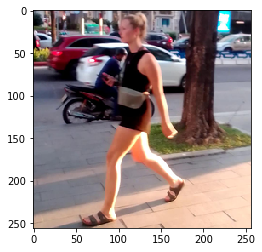

[('miniskirt, mini', '67.7%'), ('maillot', '3.6%'), ('unicycle, monocycle', '2.6%'), ('crutch', '2.0%'), ('jinrikisha, ricksha, rickshaw', '1.0%')]


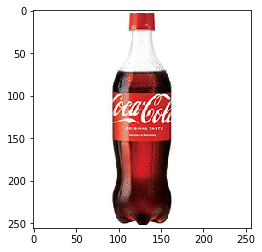

[('pop bottle, soda bottle', '72.7%'), ('beer bottle', '6.1%'), ('beer glass', '0.6%'), ('water bottle', '0.5%'), ('bottlecap', '0.4%')]


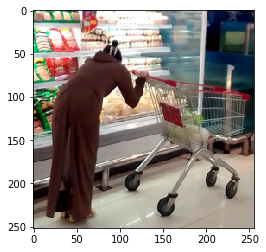

[('shopping cart', '70.4%'), ('shopping basket', '15.5%'), ('grocery store, grocery, food market, market', '2.9%'), ('bakery, bakeshop, bakehouse', '0.4%'), ("plunger, plumber's helper", '0.3%')]


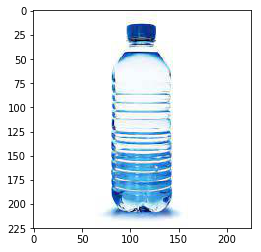

[('water bottle', '86.7%'), ('nipple', '1.6%'), ('pill bottle', '1.0%'), ('water jug', '0.8%'), ('perfume, essence', '0.6%')]


In [8]:
for uri, result in zip(uris, results):
    img = Image.open(uri)
    img.thumbnail((256,256), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    print(result)